<a href="https://colab.research.google.com/github/NguyenQuanManh/TTNT3/blob/main/BTVN01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=032a19f6038a37d92a11d6bd32e3367fe1719449372e3127bd857219fb16492c
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


58.607808858785916


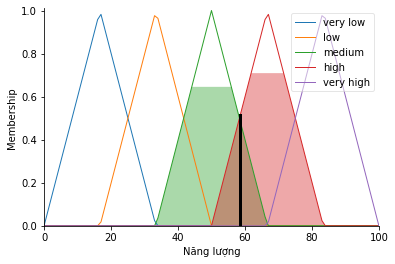

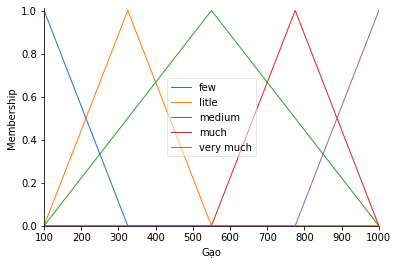

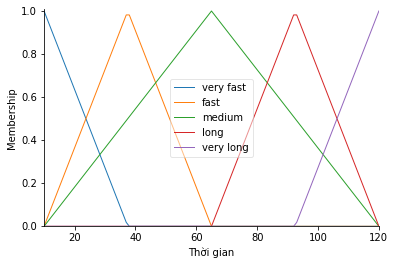

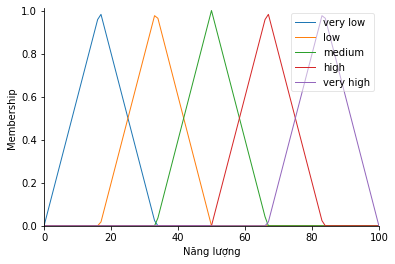

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(10,121,1),'Thời gian')
rice = ctrl.Antecedent(np.arange(100,1001,5),'Gạo')
power = ctrl.Consequent(np.arange(0,101,1),'Năng lượng')
rice['few'] = fuzz.trimf(rice.universe,[100,100,325])
rice['litle'] = fuzz.trimf(rice.universe,[100,325,550])
rice['medium'] = fuzz.trimf(rice.universe,[100,550,1000])
rice['much'] = fuzz.trimf(rice.universe,[550,775,1000])
rice['very much'] = fuzz.trimf(rice.universe,[775,1000,1000])
time['very fast'] = fuzz.trimf(time.universe,[10,10,37.5])
time['fast'] = fuzz.trimf(time.universe,[10,37.5,65])
time['medium'] = fuzz.trimf(time.universe,[10,65,120])
time['long'] = fuzz.trimf(time.universe,[65,92.5,120])
time['very long'] = fuzz.trimf(time.universe,[92.5,120,120])
power['very low'] = fuzz.trimf(power.universe,[0,16.7,33.4])
power['low'] = fuzz.trimf(power.universe,[16.7,33.4,50])
power['medium'] = fuzz.trimf(power.universe,[33.4,50,66.7])
power['high'] = fuzz.trimf(power.universe,[50,66.7,83.4])
power['very high'] = fuzz.trimf(power.universe,[66.7,83.4,100])
# luật
rule1 = ctrl.Rule(time['very fast']&rice['few'],power['high'])
rule2 = ctrl.Rule(time['very fast']&rice['litle'],power['high'])
rule3 = ctrl.Rule(time['very fast']&rice['medium'],power['high'])
rule4 = ctrl.Rule(time['very fast']&rice['much'],power['high'])
rule5 = ctrl.Rule(time['very fast']&rice['very much'],power['very high'])
rule6 = ctrl.Rule(time['fast']&rice['few'],power['medium'])
rule7 = ctrl.Rule(time['fast']&rice['litle'],power['high'])
rule8 = ctrl.Rule(time['fast']&rice['medium'],power['high'])
rule9 = ctrl.Rule(time['fast']&rice['much'],power['high'])
rule10 = ctrl.Rule(time['fast']&rice['very much'],power['very high'])
rule11 = ctrl.Rule(time['medium']&rice['few'],power['medium'])
rule12 = ctrl.Rule(time['medium']&rice['litle'],power['medium'])
rule13 = ctrl.Rule(time['medium']&rice['medium'],power['medium'])
rule14 = ctrl.Rule(time['medium']&rice['much'],power['high'])
rule15 = ctrl.Rule(time['medium']&rice['very much'],power['very high'])
rule16 = ctrl.Rule(time['long']&rice['few'],power['very low'])
rule17 = ctrl.Rule(time['long']&rice['litle'],power['low'])
rule18 = ctrl.Rule(time['long']&rice['medium'],power['medium'])
rule19 = ctrl.Rule(time['long']&rice['much'],power['medium'])
rule20 = ctrl.Rule(time['long']&rice['very much'],power['high'])
rule21 = ctrl.Rule(time['very long']&rice['few'],power['very low'])
rule22 = ctrl.Rule(time['very long']&rice['litle'],power['very low'])
rule23 = ctrl.Rule(time['very long']&rice['medium'],power['low'])
rule24 = ctrl.Rule(time['very long']&rice['much'],power['low'])
rule25 = ctrl.Rule(time['very long']&rice['very much'],power['medium'])
#lệnh
powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['Gạo'] = 652
powering.input['Thời gian'] = 45.5
powering.compute()
print(powering.output['Năng lượng'])
power.view(sim = powering)
rice.view()
time.view()
power.view()